In [2]:
import sys
import os

sys.path.append(os.path.abspath('..'))

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.plotting import set_project_style

from sklearn.linear_model import LinearRegression # 예측 모델용

In [4]:
# 시각화 관련 기본 설정
set_project_style()

Seaborn style and Korean font (Malgun Gothic) applied.


In [5]:
# github 데이터셋
df_github = pd.read_csv('../dataset/github_all_years_cleaned.csv', encoding='utf-8')
df_github['created_at'] = pd.to_datetime(df_github['created_at'])
df_github.head()

,id,name,full_name,owner,owner_type,description,language,stars,forks,watchers,...,topics,license,default_branch,has_wiki,has_pages,archived,period,search_text,ai_field,keyword
0,326059244,mirotalk,miroslavpejic85/mirotalk,miroslavpejic85,User,"🚀 WebRTC - P2P - Simple, Secure, Fast Real-Tim...",JavaScript,4015,680,4015,...,chatgpt|conference|conferencing|decentralized|...,GNU Affero General Public License v3.0,master,True,False,False,Before,"🚀 WebRTC - P2P - Simple, Secure, Fast Real-Tim...",LLM,NaN
1,326020989,TerrainAndAIPractice,tyler-lady/TerrainAndAIPractice,tyler-lady,User,A project I have used for general practice of ...,NaN,0,0,0,...,NaN,No License,main,True,False,False,Before,A project I have used for general practice of ...,Others,AI Agent
2,325951888,superpowers-skills,xitachixxx/superpowers-skills,xitachixxx,User,💪 Enhance your Claude Code superpowers with a ...,HTML,0,0,0,...,amazon-lex-chatbot|amazon-web-services|authent...,MIT License,main,True,False,False,Before,💪 Enhance your Claude Code superpowers with a ...,LLM,NaN
3,326066116,best-of-jupyter,ml-tooling/best-of-jupyter,ml-tooling,Organization,"🏆 A ranked list of awesome Jupyter Notebook, H...",NaN,1157,89,1157,...,awesome|best-of|best-of-list|collections|deep-...,Creative Commons Attribution Share Alike 4.0 I...,main,False,False,False,Before,"🏆 A ranked list of awesome Jupyter Notebook, H...",Others,NaN
4,326002236,ViT,FrancescoSaverioZuppichini/ViT,FrancescoSaverioZuppichini,User,Implementing Vi(sion)T(transformer),NaN,443,61,443,...,computer-vision|deep-learning,No License,main,True,False,False,Before,Implementing Vi(sion)T(transformer) computer-v...,NLP,NaN


In [6]:
# StackOverflow 데이터셋
df_stack = pd.read_csv('../dataset/stackoverflow_all_years_cleaned.csv', encoding='utf-8')
df_stack['creation_date'] = pd.to_datetime(df_stack['creation_date'], format='ISO8601')
df_stack.head()

,id,title,tags,creation_date,tags_processed,period,AI_field,has_vibe_coding_tag,has_ai_agent_tag,has_autonomous_tag
0,73250763,Error CS0246: The type or namespace name 'Stre...,c#|unity3d,2022-08-05 13:43:25.850000+00:00,c#|unity3d,Before,Other,False,False,False
1,73321062,How to install specific SDK (I need 6.0.300),.net|sdk|windows-subsystem-for-linux,2022-08-11 12:58:42.827000+00:00,.net|sdk|windows-subsystem-for-linux,Before,Other,False,False,False
2,73511481,Graphql Permessions for Ticket Only And Admins...,amazon-web-services|graphql|amplify,2022-08-27 13:42:09.123000+00:00,amazon-web-services|graphql|amplify,Before,Other,False,False,False
3,73519558,Divi custom header on phone not matching others,header|divi,2022-08-28 14:31:09.600000+00:00,header|divi,Before,Other,False,False,False
4,73282909,How can I find an old API Google Maps Address ...,api,2022-08-08 19:11:09.300000+00:00,api,Before,Other,False,False,False


In [7]:
# GitHub 월별 집계 (ai_field 기준)
monthly_github = df_github.groupby([
    'ai_field',
    pd.Grouper(key='created_at', freq='ME') # 월말(ME) 기준
]).size().reset_index(name='github_count')

# 피벗: 'ai_field'를 컬럼으로
monthly_github_pivot = monthly_github.pivot(index='created_at', columns='ai_field', values='github_count').fillna(0)
# 컬럼명 변경: 예: 'LLM' -> 'GitHub_LLM'
monthly_github_pivot.columns = ['GitHub_' + col for col in monthly_github_pivot.columns]

print("GitHub 월별 집계 및 피벗 완료")


GitHub 월별 집계 및 피벗 완료


In [8]:
# Stack Overflow 월별 집계 (AI_field 기준)
monthly_stack = df_stack.groupby([
    'AI_field',
    pd.Grouper(key='creation_date', freq='ME')
]).size().reset_index(name='stack_count')
# 피벗: 'AI_field'를 컬럼으로
monthly_stack_pivot = monthly_stack.pivot(index='creation_date', columns='AI_field', values='stack_count').fillna(0)
# 컬럼명 변경: 예: 'LLM' -> 'SO_LLM'
monthly_stack_pivot.columns = ['SO_' + col for col in monthly_stack_pivot.columns]

print("Stack Overflow 월별 집계 및 피벗 완료")

Stack Overflow 월별 집계 및 피벗 완료


In [9]:
# 두 집계 데이터 병합 (Merge)
# 날짜 인덱스를 기준으로 두 데이터를 합침 'outer' 조인으로 모든 날짜 포함
merged_df = pd.merge(monthly_github_pivot, monthly_stack_pivot, left_index=True, right_index=True, how='outer').fillna(0)

# 분석에 사용할 주요 분야만 선택 - 예시
# 님의 ai_field/AI_field 컬럼에 있는 실제 이름으로 확인 필요
target_fields = ['LLM', 'Computer Vision', 'NLP', 'General ML'] # 예시 분야
target_cols = [f'GitHub_{field}' for field in target_fields] + [f'SO_{field}' for field in target_fields]
# merged_df에 해당 컬럼이 있는지 확인 후 진행
analysis_cols = [col for col in target_cols if col in merged_df.columns]
merged_analysis_df = merged_df[analysis_cols]

print("월별 데이터 병합 완료")
merged_analysis_df.head()

월별 데이터 병합 완료


,GitHub_LLM,GitHub_Computer Vision,GitHub_NLP,GitHub_General ML,SO_LLM,SO_Computer Vision,SO_NLP,SO_General ML
2021-01-31 00:00:00+00:00,82,106,146,4065,123.0,739.0,218.0,6447.0
2021-02-28 00:00:00+00:00,62,93,122,3548,104.0,737.0,250.0,6406.0
2021-03-31 00:00:00+00:00,67,100,169,3840,155.0,792.0,285.0,7371.0
2021-04-30 00:00:00+00:00,82,94,158,3890,145.0,735.0,286.0,6658.0
2021-05-31 00:00:00+00:00,80,97,182,4143,170.0,753.0,254.0,6503.0


In [10]:
# 피어슨(Pearson) 상관관계 행렬(Matrix) 계산
correlation_matrix = merged_analysis_df.corr()

print("상관관계 행렬 계산 완료")
correlation_matrix

상관관계 행렬 계산 완료


,GitHub_LLM,GitHub_Computer Vision,GitHub_NLP,GitHub_General ML,SO_LLM,SO_Computer Vision,SO_NLP,SO_General ML
GitHub_LLM,1.000000,0.690356,0.908496,0.918192,-0.698779,-0.704648,-0.708279,-0.713737
GitHub_Computer Vision,0.690356,1.000000,0.815648,0.871919,-0.664280,-0.670876,-0.677467,-0.680569
GitHub_NLP,0.908496,0.815648,1.000000,0.971916,-0.596919,-0.607087,-0.608759,-0.614193
GitHub_General ML,0.918192,0.871919,0.971916,1.000000,-0.672626,-0.681632,-0.690721,-0.695090
SO_LLM,-0.698779,-0.664280,-0.596919,-0.672626,1.000000,0.976437,0.977243,0.982036
SO_Computer Vision,-0.704648,-0.670876,-0.607087,-0.681632,0.976437,1.000000,0.989450,0.990999
SO_NLP,-0.708279,-0.677467,-0.608759,-0.690721,0.977243,0.989450,1.000000,0.994625
SO_General ML,-0.713737,-0.680569,-0.614193,-0.695090,0.982036,0.990999,0.994625,1.000000


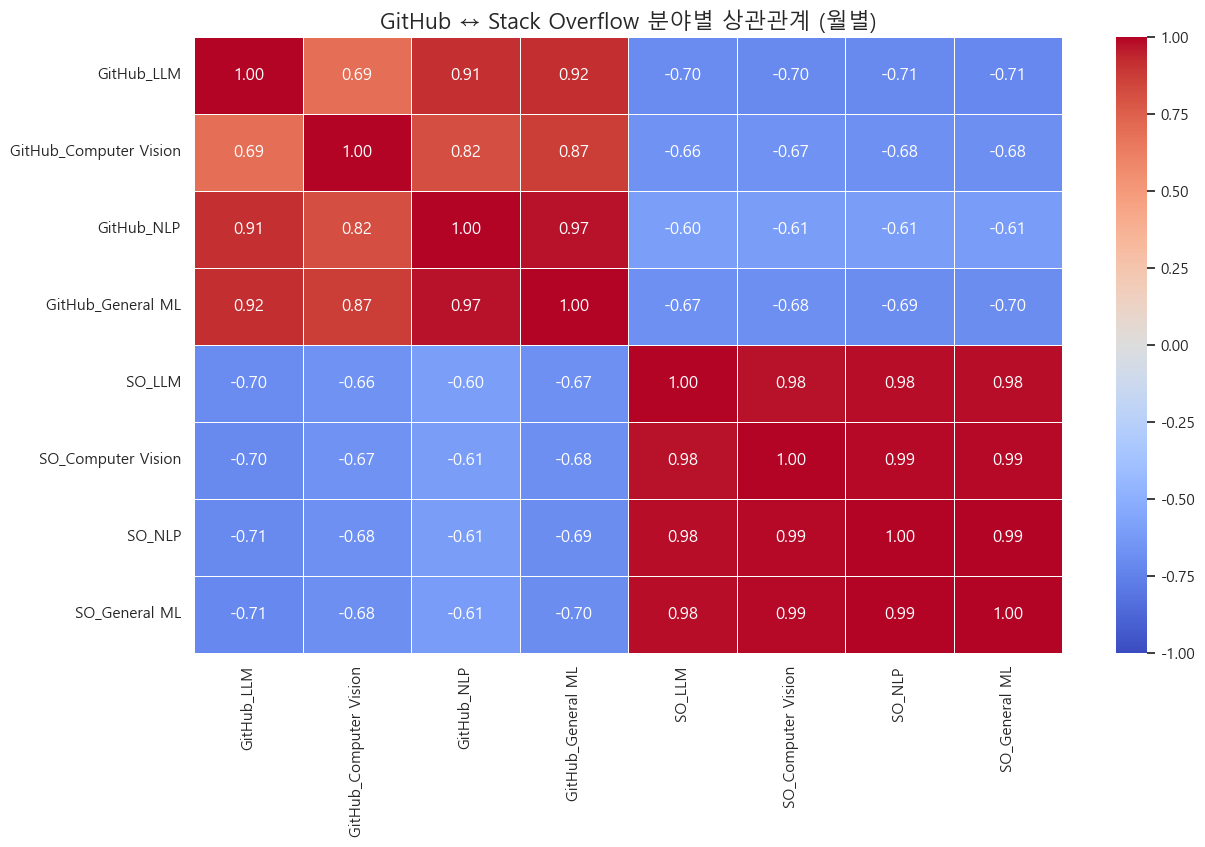

In [11]:
plt.figure(figsize=(14, 8))

sns.heatmap(
    correlation_matrix,
    annot=True,             # 히트맵 안에 상관계수 표시
    fmt='.2f',              # 숫자를 소수점 둘째 자리까지 표시
    cmap='coolwarm',        # 파란색: 음, 빨간색: 양, 0에 가까우면 흰색
    linewidths=.5,          # 셀 사이 경계선
    vmin=-1, vmax=1         # 색상 범위를 -1 ~ +1로 고정
)

plt.title('GitHub ↔ Stack Overflow 분야별 상관관계 (월별)', fontsize=16)
plt.show()

In [12]:
# (이전과 동일) Top 10 언어 리스트 확보 (HTML/CSS 제외)
df_lang = df_github.dropna(subset=['language'])
exclude_languages = ['HTML', 'CSS']
df_lang_filtered = df_lang[~df_lang['language'].isin(exclude_languages)]
top_10_languages = df_lang_filtered['language'].value_counts().nlargest(10).index.tolist()
print(f"GitHub Top 10 언어: {top_10_languages}")

GitHub Top 10 언어: ['Jupyter Notebook', 'Python', 'JavaScript', 'TypeScript', 'Java', 'C++', 'R', 'C#', 'Go', 'MATLAB']


In [13]:
df_top10_lang_gh = df_github[df_github['language'].isin(top_10_languages)]

In [14]:
# 월별 집계 및 피벗
monthly_github = df_top10_lang_gh.groupby([
    'language',
    pd.Grouper(key='created_at', freq='ME')
]).size().unstack(level=0, fill_value=0) # unstack으로 language를 컬럼으로

In [15]:
# 컬럼명 변경 (예: 'Python' -> 'GitHub_Python')
monthly_github.columns = ['GitHub_' + col for col in monthly_github.columns]

In [16]:
# Stack Overflow 월별 집계
print("Stack Overflow 태그 분리 작업 시작...")
print(df_stack['tags_processed'].head)
df_stack['tags_processed'] = df_stack['tags_processed'].fillna('')
# SO 태그를 리스트로 분리 (utils 함수 사용)
df_stack['tags_processed'] = df_stack['tags_processed'].apply(lambda x: x.split('|') if x else [])
print(df_stack['tags_processed'].head)

Stack Overflow 태그 분리 작업 시작...
<bound method NDFrame.head of 0                                    c#|unity3d
1          .net|sdk|windows-subsystem-for-linux
2           amazon-web-services|graphql|amplify
3                                   header|divi
4                                           api
                           ...                 
2898363                                  python
2898364                                  python
2898365                                  python
2898366                                  python
2898367                                  python
Name: tags_processed, Length: 2898368, dtype: object>
<bound method NDFrame.head of 0                                     [c#, unity3d]
1          [.net, sdk, windows-subsystem-for-linux]
2           [amazon-web-services, graphql, amplify]
3                                    [header, divi]
4                                             [api]
                             ...                   
2898363         

In [17]:
# 태그 '분해(Explode)'
# ['python', 'pandas'] 행을 2개의 행으로 복제
df_stack_exploded = df_stack.explode('tags_processed')
print("태그 분해(Explode) 완료")

태그 분해(Explode) 완료


In [18]:
# 매칭용 GitHub 언어 리스트를 소문자로 변경
# SO 태그는 보통 소문자이므로, 소문자 리스트로 필터링
target_languages_lower = [lang.lower() for lang in top_10_languages]

In [19]:
# 월별 집계 및 피벗
monthly_stack = df_stack_exploded.groupby([
    'tags_processed',
    pd.Grouper(key='creation_date', freq='ME')
]).size().unstack(level=0, fill_value=0) # unstack으로 tags_processed를 컬럼으로

In [20]:
# Top 10 언어에 해당하는 '태그'만 필터링
# SO에는 수만 개의 태그가 있으므로, GitHub Top 10과 일치하는 태그만 남김
target_so_cols = [col for col in monthly_stack.columns if col in target_languages_lower]
monthly_stack_pivot = monthly_stack[target_so_cols]

In [21]:
# 컬럼명 변경 (예: 'python' -> 'SO_python')
monthly_stack_pivot.columns = ['SO_' + col for col in monthly_stack_pivot.columns]

In [22]:
# 두 집계 데이터 병합 (Merge)
# GitHub 컬럼명도 소문자로 통일하여 병합
monthly_github_pivot = monthly_github.rename(columns=lambda c: c.lower())

merged_df = pd.merge(monthly_github_pivot, monthly_stack_pivot, left_index=True, right_index=True, how='outer').fillna(0)

print("언어별 월별 데이터 병합 완료")
merged_df.head()

언어별 월별 데이터 병합 완료


,github_c#,github_c++,github_go,github_java,github_javascript,github_jupyter notebook,github_matlab,github_python,github_r,github_typescript,SO_c#,SO_c++,SO_go,SO_java,SO_javascript,SO_matlab,SO_python,SO_r,SO_typescript
2021-01-31 00:00:00+00:00,79,148,15,141,188,6619,219,3289,170,34,6200.0,4108.0,567.0,8047.0,16892.0,281.0,22907.0,4342.0,2673.0
2021-02-28 00:00:00+00:00,68,112,22,110,195,6089,177,2851,148,37,5812.0,4102.0,571.0,7600.0,15302.0,288.0,21427.0,4333.0,2538.0
2021-03-31 00:00:00+00:00,93,148,8,142,178,6764,208,3255,158,28,6405.0,4311.0,761.0,8679.0,16784.0,297.0,23963.0,5183.0,3090.0
2021-04-30 00:00:00+00:00,94,159,17,124,177,6620,195,3242,136,29,5918.0,3950.0,627.0,7941.0,15876.0,296.0,22738.0,4803.0,2808.0
2021-05-31 00:00:00+00:00,81,144,10,116,176,8226,201,3290,154,31,5763.0,4199.0,645.0,7982.0,15833.0,216.0,22487.0,4676.0,2732.0


In [23]:
# 상관관계 행렬(Matrix) 계산
correlation_matrix = merged_df.corr()
print("언어별 상관관계 행렬 계산 완료")

언어별 상관관계 행렬 계산 완료


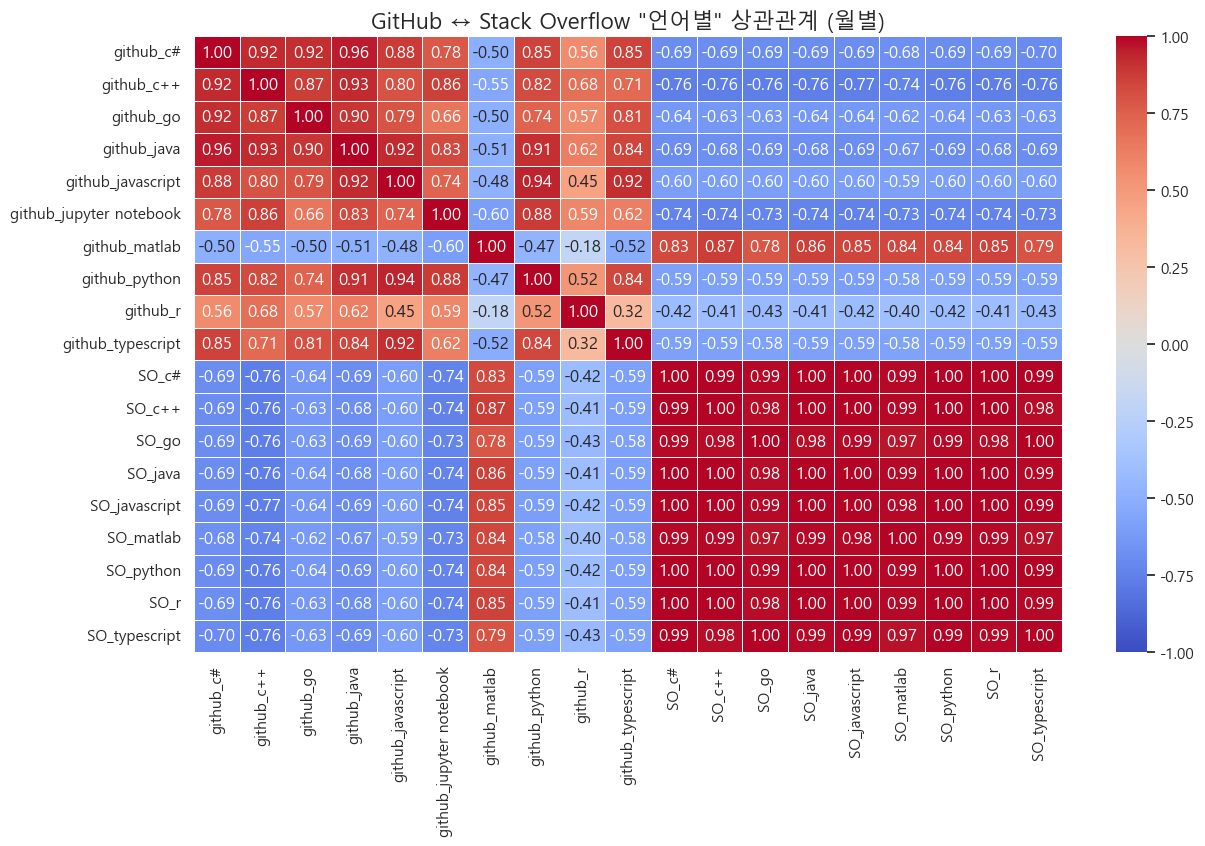

In [24]:
plt.figure(figsize=(14, 8))

sns.heatmap(
    correlation_matrix,
    annot=True,      
    fmt='.2f',       
    cmap='coolwarm', 
    linewidths=.5,   
    vmin=-1, vmax=1   
)

plt.title('GitHub ↔ Stack Overflow "언어별" 상관관계 (월별)', fontsize=16)
plt.show()

In [25]:
# Top 10 언어별로 회귀 모델 반복 학습
print("\nTop 10 언어별 선형 회귀 모델 학습 시작")

results_list = [] # 각 언어의 모델 결과를 저장할 리스트

# Top 10 언어 리스트를 순회
for lang in top_10_languages:
    # 컬럼명은 소문자로 통일했었음
    lang_lower = lang.lower()
    
    col_gh = f'github_{lang_lower}'
    col_so = f'SO_{lang_lower}'

    # 해당 언어의 컬럼이 둘 다 존재하는지 확인
    if col_gh in merged_df.columns and col_so in merged_df.columns:
                
        X = merged_df[[col_so]]  # X(원인) = Stack Overflow
        y = merged_df[col_gh]    # y(결과) = GitHub

        # 모델 생성 및 학습(fit)
        model = LinearRegression()
        model.fit(X, y)
        
        # R-squared (설명력) 계산
        r_squared = model.score(X, y)
        
        # 결과 저장
        results_list.append({
            'Language': lang,
            'Model (Y = mX + b)': f"Y = {model.coef_[0]:.2f} * X + {model.intercept_:.2f}",
            'Slope (m)': model.coef_[0],
            'Intercept (b)': model.intercept_,
            'R-squared': r_squared
        })
    else:
        print(f"  - [경고] {lang} 언어는 GitHub/SO 쌍이 맞지 않아 건너뜁니다.")


Top 10 언어별 선형 회귀 모델 학습 시작
  - [경고] Jupyter Notebook 언어는 GitHub/SO 쌍이 맞지 않아 건너뜁니다.


In [31]:
# (결과 리스트를 보기 좋게 DataFrame으로 변환)
results_df = pd.DataFrame(results_list)

print("어별 회귀 모델 학습 요약")
results_df

어별 회귀 모델 학습 요약


,Language,Model (Y = mX + b),Slope (m),Intercept (b),R-squared
0,Python,Y = -0.38 * X + 11527.15,-0.380357,11527.152830,0.352442
1,JavaScript,Y = -0.13 * X + 2229.14,-0.132112,2229.139560,0.360368
2,TypeScript,Y = -0.51 * X + 1608.32,-0.505577,1608.315389,0.343246
3,Java,Y = -0.03 * X + 325.48,-0.028598,325.480277,0.467990
4,C++,Y = -0.03 * X + 250.41,-0.031661,250.411774,0.579037
5,R,Y = -0.01 * X + 166.78,-0.006996,166.777463,0.170623
6,C#,Y = -0.02 * X + 187.60,-0.019496,187.604547,0.482109
7,Go,Y = -0.24 * X + 184.14,-0.237832,184.139466,0.400200
8,MATLAB,Y = 0.30 * X + 82.00,0.300494,81.996260,0.704192
